In [1]:
import sys

In [2]:
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from munc13 import Munc13, Solver

In [4]:
import sys
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [5]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [6]:
# this is used to create the model for analysis and plotting without running the GA
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.001, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 1000}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.1, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 100},   # krc
        "kfxx":      {"min": 0.01, "max": 10},   # kx2 uM-1s-1
        "krxx":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eLoop":       {"min": 1,   "max": 100}, # sig, scale factor >1
        "eDF":      {"min": 0.001,   "max": 1}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 10},   # S0 (uM)
        "R0":        {"min": 1, "max": 1000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.1,   "max": 100}, # X0  (/um^2)
         
}

# Order in which the solver will read parameters from a candidate
params_to_optimize = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfxx","krxx","eLoop","eDF","kfdd","stimUpSR","S0","R0","X0"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimize, t_max=maxTime)

Gamma is 333.3333333333333


# use a specific parameter set and look at the solution.
# only prestimulation

[0.06277682 0.06247427 0.06246385 ... 0.06235493 0.06235493 0.06235493]
[6.857017031825865, 44.07774580033118, 0.46509602833326014, 0.41125621867458395, 0.2582282665310926, 0.014430544872312146, 0.2952223146486258, 0.10575464051767629, 10, 0.7678971603389042, 0.00732273460206515, 0.043771339432393114, 0.23087665463186352, 45.29263770939414, 0.06277682126126248, 60.7406661534452, 0.069389012282451]
Cluster density chi: Simulated 0.021899963174955756, Experimental 0.024375, Chi -0.051551829883077716
Small cluster density chi: Simulated 0.0017616197451622824, high density 0.021899963174955756, Chi 0
Percent of mem munc13 in clusters: 15.521021843821284%. Percent munc13 on the membrane: 0.6720458552167968%. Monomer mem: 68.62732355874775%. Dimer mem: 7.490334353648867%
Change in density over last 25%: 0.00020513627413424468, associated chi: -0.0012301104688391918
Cluster density chi: Simulated 0.012193116064162434, Experimental 0.0109375, Chi -0.06589426209782656
Small cluster density chi:

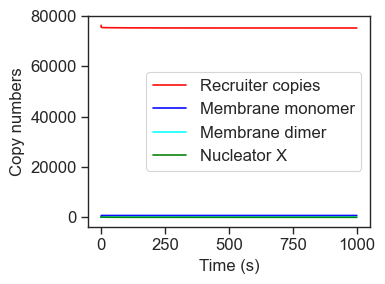

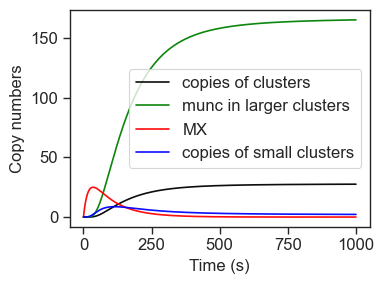

<Figure size 640x480 with 0 Axes>

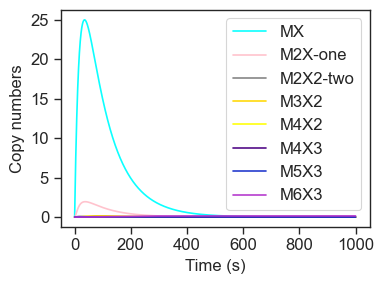

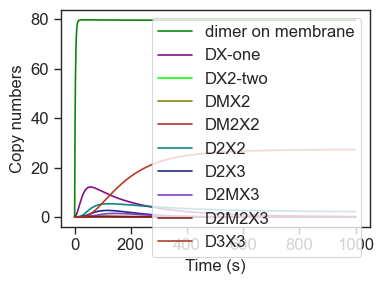

In [7]:
low1 = [0.19280917492092398, 6.345538383656195, 0.008338623061696039, 931.9281949916707, 0.027897164735378663, 0.21029166797357027, 3.6072743741489997, 16.52103503237623, 3.096341754360337, 0.6511235557542634, 2.9152867028351985, 0.004189366876445601, 0.022275726101785066, 23.831007837665823, 0.034463996588883834, 291.8346780370225, 4.199891525170765]
#low2=[0.19281, 6.3455, 0.0058888, 687.39, 0.027897, 0.21029, 3.6073, 16.521, 3.0963, 0.65112, 3.2166, 0.0031555, 0.022276, 23.831, 0.034464, 291.83, 4.1999]
#low2=[0.15019457492757146, 0.03471466177364948, 0.001, 0.0125695557090747, 0.06308754971859099, 0.566048703443486, 0.8858951965514484, 0.1816697295206523, 1.8467048647080402, 14.382393363562, 1.3345243036308372, 0.09280810695255375, 1, 5.471073149025038, 0.007646756200094223, 37.45702488861859, 0.35135134493885456]
low2=[0.2642125034075746, 0.2887430048874226, 1.6090821155934083, 0.9339522784014574, 0.0029483178916808283, 0.03148546107207491, 4.730291198372777, 4.187508823465768, 3.140067712202445, 0.06044918318120396, 24.86495534604118, 0.001, 0.09979599251960969, 13.159337961874357, 0.01, 121.85346254917246, 0.1094248861967725]
low2=[2.554781287140369, 0.001, 0.45078463135134816, 74.97397732485449, 0.1729522922844633, 497.2479634054802, 1.0259267953913058, 6.922804010289599, 0.05869353556121985, 0.07168986420329185, 2.349022359735784, 0.0025017744965558516, 0.035363164065782486, 27.10725738226453, 0.01, 205.3792639259202, 1.121801550165552]
low2=[0.9946394627161883, 0.03913110722654638, 7.557328626040687, 5.995902915346929, 0.9767574538872277, 37.4174610576011, 2.91250063991091, 0.11581759114661289, 0.6435467636367203, 30.304943014787305, 2.1181610785330225, 0.005278769491172638, 0.4033842130257309, 48.77474143281317, 0.01, 3.1755443550470797, 0.8472192758481225]
lowTest=[9.000341884408902, 0.001, 0.024874081496655306, 0.18619385334523933, 1.5027275186336115, 406.2476863737097, 0.34554369849414646, 0.5389525829509899, 3.2397843239161377, 122.75020447937611, 2.671091038217679, 0.0009596841693235142, 0.013642994096301929, 9.563695488995796, 0.01, 1.3955596985512482, 5.234777784627565]
low2=[4.2897154747040815, 0.942547166043141, 4.279135361933162, 874.6041433273185, 1.3904652311359968, 910.0835495626169, 0.3476863928651955, 0.3746701651515872, 0.7369183764651498, 41.61098349376311, 4.751895638031443, 0.005719077271046142, 0.14736212957889355, 7.905531689772856, 0.1, 2.196250992006981, 60.662320625844714]
low2=[1.1842701590243783, 1.4045536157036864, 0.00802823677497483, 30.965656380625184, 0.1505398399696384, 0.13838788481765402, 4.986551129885787, 9.822827303324235, 1.0556283268749314, 0.044034991208889616, 15.095582381282638, 0.0643859684425882, 0.48637632333114295, 1.4469151592542153, 0.001, 1000, 0.13363173864090117]
low2=[1.2801862926640144, 0.004749007598905825, 1.483541259366853, 407.82504009113546, 0.25195906335897145, 0.010701012473308139, 10, 0.022327363764433027, 0.33955612422593334, 0.015003470486847715, 39.24017232501081, 0.260215379656555, 1, 14.518263911872207, 0.001, 0.5819460565510638, 63.273086658089284]
low2=[5.032560382134527, 0.0011613243130062544, 0.025070396027975256, 10.480409324984636, 3.0950428551227898, 0.1387714095896693, 0.15764641314300815, 0.11687620407927382, 0.15215991059599424, 21.90088859775862, 70.90086576924999, 0.004324896493378497, 0.022661840395374805, 4.332333684537735, 0.001, 7.2627835512375665, 26.58681363503688]
low2=[3.026892176638656, 0.005974747271987367, 6.40256824798971, 3.0229967475430835, 0.006417282485916942, 0.010041429967899475, 8.911742974390535, 0.299870372178897, 9.114424453489859, 0.0786077703721419, 1.117722765049709, 0.011264495757455925, 0.9295163582769946, 9.664745311764907, 0.01, 0.1868727967785008, 81.40052113960019]
low2=[0.516849326600676, 0.00281084132308059, 0.0021345474145620046, 67.63447970502293, 2.700214471835962, 0.010350593264239686, 0.1, 1.4384499979822163, 0.200385702715316, 1.6636961314488008, 5.924717005533296, 0.0024615529542706747, 0.012176132074379715, 15.516364958747873, 0.01, 0.10780304255174558, 100]
low2=[1.553953359209962, 0.0014921454809081877, 0.0031782539405213195, 204.50785167948746, 3.0047359773106845, 0.041383444280891524, 0.22119633144005993, 63.09271622168534, 2.317331668815111, 5.992963341335691, 42.87314924055024, 0.0005677852727391179, 0.44423169030470433, 2.1568223892424134, 0.01, 0.16105338610884845, 58.56216986201357]
low2=[3.098544605749524, 0.001, 0.8400625751340008, 0.028441388348338054, 0.0483360965772155, 5.674309064925563, 2.713889868411553, 0.2698094926546676, 0.7837081839774638, 5.094224422682223, 1.223652686863553, 0.00039858197455491145, 0.22028011422447843, 12.104716190479868, 0.034447482731559856, 0.5364888065164458, 1.067785794196555]
low2=[1.618975611002608, 0.02393858846121423, 0.012737229623404385, 399.83095998120115, 0.33361771019902564, 3.2950287391472504, 5.794823136267643, 0.01, 0.16089974879772814, 2.7782115210910137, 100, 0.0005405548828599281, 0.15390850191022387, 38.230851331102876, 0.0015344300856228578, 27.1868699160247, 0.1]
low2=[1.7173, 0.0016764, 0.016877, 0.050584, 2.6769, 201.83, 2.4856, 1.0341, 6.7319, 0.020206, 1.0366, 0.003412, 0.019369, 5.9318, 0.034529, 0.21279, 100]
low2=[0.004117499254789287, 0.11142474475049265, 0.0014766631621844955, 0.013793075223554205, 4.126529194676555, 0.14094461989709384, 1.0721112023981305, 1.5258294165374977, 2.194285555166436, 2.1756630067935236, 3.526093723096668, 0.009836962305250264, 0.02809917006193916, 2.8426301901928093, 0.020960928381936948, 602.5947483790097, 0.11480141595538651]
low2=[0.3613806304517524, 0.020597934104722878, 6.316986361256334, 4.720330318093496, 0.3298167839211023, 0.8515947161882222, 3.4871975621843934, 0.36253247353838985, 9.501964731032212, 121.9597191967641, 3.248758965128522, 0.0008236248394258011, 0.12949369884613082, 1.8838919066337445, 0.004778638054991655, 5.18217559917297, 0.10807086271725859]
low2=[0.003902346908828758, 0.07308704922904637, 0.5448133470774609, 43.65918667763872, 1.0642267179591325, 0.18503784610233084, 0.955670293267149, 0.023841562520719343, 3.2365282479647126, 71.48005938730616, 3.551670781170701, 0.05252544320447757, 0.6600280564688126, 22.51530633961624, 0.1862729518339126, 17.953012605622312, 0.05839700307553549]
low2=[0.2897233640177482, 0.10215733876827669, 5.2700308825126925, 132.053065313204, 3.7735495010695392, 1.903460493379225, 0.38394972026717666, 0.05010152409565657, 2.481508947317436, 1.7843988370375738, 4.264629006615217, 0.0017166811147707058, 0.2395408890889559, 3.852068708111609, 0.003545609843327199, 39.082493064665, 0.0748458755907162]
low2=[0.1577398714684495, 0.027599412552335174, 0.003427274758123889, 631.9157136209009, 0.02178484891660457, 0.02155222386003075, 9.24528041658781, 4.920677354326318, 1.0694194491816535, 0.5626045012434377, 1.7976961579309545, 0.0018908102812246032, 0.03113235184498593, 34.474456113536114, 0.027568253833023713, 3.2056872690705918, 0.08497343926792755]
low2=[0.03533716347807267, 0.012089056045015716, 0.05247364908124179, 0.5658796198708681, 0.4135266635811052, 0.16716750691572244, 1.5187561072387545, 0.1705831756080885, 7.329079150538221, 0.9839913230053364, 7.354217641303842, 0.00023979809776001612, 0.860473688873235, 83.8755556583024, 0.001262957932037922, 80.69245251391888, 0.07245800566014529]
low2=[0.07168257454819948, 0.013250901151912279, 0.004898390282115934, 0.8758297953223384, 3.0424560522918997, 0.5572946032144557, 3.380906989562066, 0.0873201942154376, 1.6329657453578934, 47.58625094166674, 3.994944925982537, 0.010344239213141886, 0.017846178557934616, 53.66285530759832, 0.02392708322122757, 2.180465003084446, 0.07362772364763508]
low2=[0.009840190744736778, 0.005103239115502532, 0.09037598420450445, 0.7831321568865671, 0.257155191043146, 0.21531707683658483, 1.8378317842744623, 1.9294226293609646, 6.960284600985927, 0.01, 2.185450593378016, 0.0001, 0.10045940175122406, 2.815740269955859, 0.003006690706092946, 173.2135416363489, 0.07298027543502422]
low2=[5.8837131875473565, 0.6572287813697282, 0.06490826608473303, 2.5863243030855982, 6.629413671535382, 1.1590395496058348, 0.5327385824001332, 0.05289095028927658, 4.165119397109582, 71.15489567065158, 7.1352032355788575, 0.008099018621459444, 0.17296144323535587, 1.191167100732555, 0.08761845157322122, 1.2083098651627855, 0.07680065438914549]
low2=[3.168689876521802, 0.0012264160429219806, 1.2326444660457405, 0.0459870953288317, 7.790016264189948, 0.6982710570975792, 0.6255438567639025, 0.05068283053795606, 1.1843839983463484, 6.371282359799749, 6.087023864946885, 0.014711656989551273, 0.01000759860969436, 7.770401125890258, 0.001, 273.0267339638671, 0.06324291971928848]
low2=[6.857017031825865, 44.07774580033118, 0.46509602833326014, 0.41125621867458395, 0.2582282665310926, 0.014430544872312146, 0.2952223146486258, 0.10575464051767629, 10, 0.7678971603389042, 0.00732273460206515, 0.043771339432393114, 0.23087665463186352, 45.29263770939414, 0.06277682126126248, 60.7406661534452, 0.069389012282451]
test_candidate=low2
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12

In [8]:
#what is the total recruitment to the membrane and how does it change following dimer deletion?


In [9]:
pclus, pclusMem, pmem, pMono, pDimer = model.calc_percentages_cluster(sol)
copies= sol*model.cellVolume*602
print(copies[:,-1])
print("percent on mem in cluster", pclusMem)
print("percent on membrane ", pmem)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)

[1.57157708e+05 7.52269588e+04 7.29726581e+02 7.96460621e+01
 8.80242086e-04 1.35216291e-03 8.73776762e-04 1.17304474e-04
 2.04699631e-01 2.20686056e-07 3.87144038e-07 1.54802357e-05
 9.37558441e-07 4.64616051e-06 1.90017203e-07 2.21214810e+00
 7.70876654e-07 4.24278852e-04 6.35529928e-07 3.26238660e-04
 1.46089337e-01 4.39134128e-05 2.73598936e+01]
percent on mem in cluster 0.15521021843821284
percent on membrane  0.006720458552167968
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 1063.3178489983025. M 729.7265806899818. D 79.64606213200004. 
average populations diffusivity:  0.06094903821399652


In [10]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.
density = model.calculate_cluster_density(sol)
print("dimensions of density array: ",density.shape)
print("length of density array : ", len(density))
L=copies.shape[1]
print(L)
n75=np.int64(L*0.75)
#look at change in copy numbers over the final 75%. >0 means increasing
print(copies.shape)
delta = copies[:,-1]-copies[:,n75]
mx=copies[5]
x=copies[4]
print("75% mx ", mx[n75])
print("final mx: ", mx[-1])
print("75percent  x ", x[n75])
print("final X: ", x[-1])
print("initial total Munc ", copies[0][0])
print("initial total R ", copies[1][0])
print("initial total X ", copies[4][0])
        
print("binding of X to X, and dGXX (kT)", test_candidate[8], test_candidate[9], np.log(test_candidate[9]*1e-6/test_candidate[8]))
print("binding of M to X, and dGMX: ", test_candidate[4], test_candidate[5],np.log(test_candidate[5]*1e-6/test_candidate[4]))
print("binding of M to cluster, and dGC: ", test_candidate[6], test_candidate[7], np.log(test_candidate[7]*1e-6/test_candidate[6]))

print("binding of S to R, dGSR: ", test_candidate[0], test_candidate[1], np.log(test_candidate[7]*1e-6/test_candidate[6]))
print(" dimerization, dGMM ", test_candidate[2], test_candidate[3], np.log(test_candidate[3]*1e-6/test_candidate[2]))
print(" dimerization dG gain, speedup ", test_candidate[11], test_candidate[10])
print(" convert from monomers to dimer in cluster ", test_candidate[12])
print(delta.shape)
print(delta)

dimensions of density array:  (2001,)
length of density array :  2001
2001
(23, 2001)
75% mx  0.01596571392533598
final mx:  0.001352162914856839
75percent  x  0.01034883500026533
final X:  0.0008802420861162816
initial total Munc  158221.026258319
initial total R  76290.27668872717
initial total X  87.15259942675843
binding of X to X, and dGXX (kT) 10 0.7678971603389042 -16.382195111567686
binding of M to X, and dGMX:  0.2582282665310926 0.014430544872312146 -16.70000737395637
binding of M to cluster, and dGC:  0.2952223146486258 0.10575464051767629 -14.84211754053438
binding of S to R, dGSR:  6.857017031825865 44.07774580033118 -14.84211754053438
 dimerization, dGMM  0.46509602833326014 0.41125621867458395 -13.938538031413076
 dimerization dG gain, speedup  0.043771339432393114 0.00732273460206515
 convert from monomers to dimer in cluster  0.23087665463186352
(23,)
[-5.73578279e-02 -6.68011942e-02 -9.01386009e-04 -1.00475123e-04
 -9.46859291e-03 -1.46135510e-02 -9.44336608e-03 -1.26

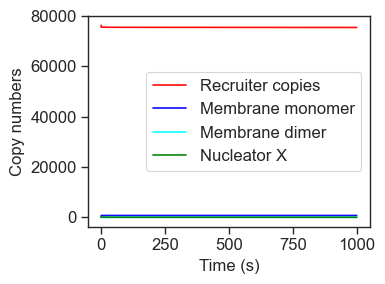

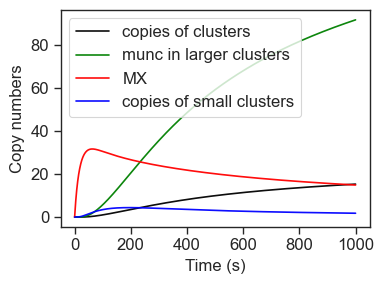

<Figure size 640x480 with 0 Axes>

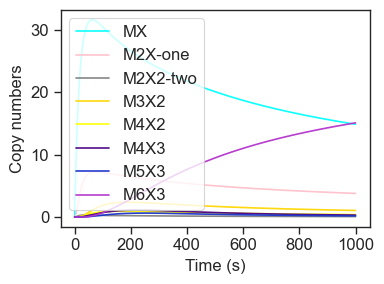

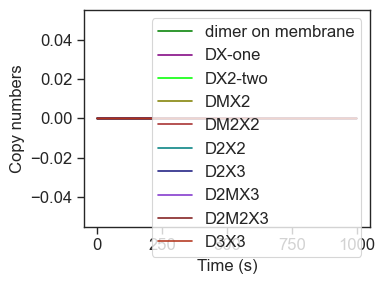

In [11]:
# Now evaluate the mutants, which will require new simulations
#first is the mutant C2A, which eliminates dimerization.
candidate_dc2a=list(test_candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mutantC2A_pre = model.simulate_pre(candidate_dc2a)


model.plot_freespecies_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)

CALCULATE DIFFUSIVITY OF WT AND MUTAN

In [12]:
print("percent on mem in cluster", pclusMem)
print("percent on membrane ", pmem)
print("percent in monomers on mem: ", pMono)
print("percent in dimers on membrane: ", pDimer)
pclus, pclusMem, pmem, pMono,pDimer = model.calc_percentages_cluster(mutantC2A_pre)
print("MUTANT percent on mem in cluster", pclusMem)
print("MUTANT percent on membrane ", pmem)
print("MUTANT percent in monomers on mem: ", pMono)
print("MUTANT percent in dimers on membrane: ", pDimer)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)
D_mutant = model.calculate_population_average_diffusion(mutantC2A_pre)
print("MUTANT average populations diffusivity: ", D_mutant)

percent on mem in cluster 0.15521021843821284
percent on membrane  0.006720458552167968
percent in monomers on mem:  0.6862732355874774
percent in dimers on membrane:  0.07490334353648867
MUTANT percent on mem in cluster 0.10748814059566028
MUTANT percent on membrane  0.005391732044817252
MUTANT percent in monomers on mem:  0.8588820839158782
MUTANT percent in dimers on membrane:  0.0
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 1063.3178489983025. M 729.7265806899818. D 79.64606213200004. 
average populations diffusivity:  0.06094903821399652
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 853.0853773803603. M 732.6997466826073. D 0.0. 
MUTANT average populations diffusivity:  0.06877476354757148


[0.06277682 0.06247427 0.06246385 ... 0.06235493 0.06235493 0.06235493]
[6.857017031825865, 44.07774580033118, 0.46509602833326014, 0.41125621867458395, 0.2582282665310926, 0.014430544872312146, 0.2952223146486258, 0.10575464051767629, 10, 0.7678971603389042, 0.00732273460206515, 0.043771339432393114, 0.23087665463186352, 45.29263770939414, 0.06277682126126248, 60.7406661534452, 0.069389012282451]
Cluster density chi: Simulated 0.021899963174955756, Experimental 0.024375, Chi -0.051551829883077716
Small cluster density chi: Simulated 0.0017616197451622824, high density 0.021899963174955756, Chi 0
Percent of mem munc13 in clusters: 15.521021843821284%. Percent munc13 on the membrane: 0.6720458552167968%. Monomer mem: 68.62732355874775%. Dimer mem: 7.490334353648867%
Change in density over last 25%: 0.00020513627413424468, associated chi: -0.0012301104688391918
Cluster density chi: Simulated 0.012193116064162434, Experimental 0.0109375, Chi -0.06589426209782656
Small cluster density chi:

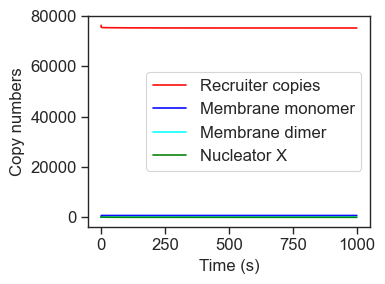

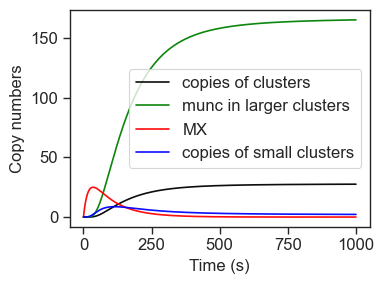

<Figure size 640x480 with 0 Axes>

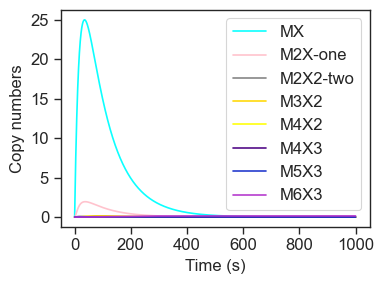

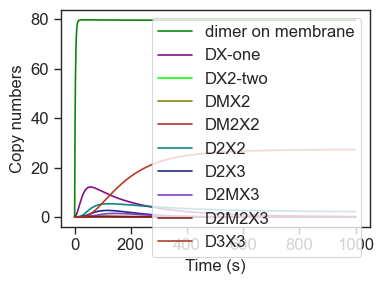

In [13]:
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)

In [14]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.

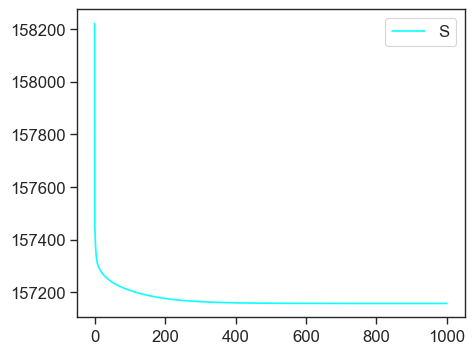

In [15]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[0], linestyle="-", label="S", color="cyan", alpha=0.95, zorder=3)
ax.legend()

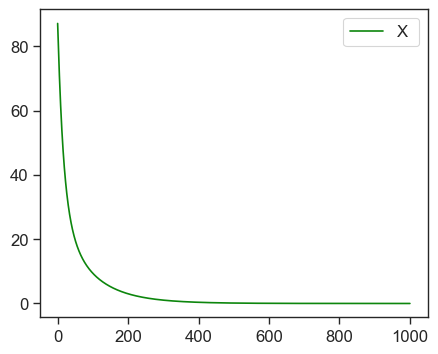

In [16]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[4], linestyle="-", label="X ", color="green", alpha=0.95, zorder=3)
ax.legend()

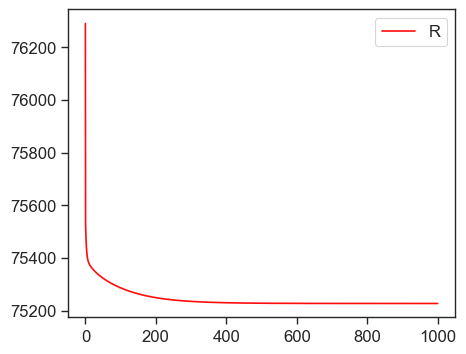

In [17]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[1], linestyle="-", label="R", color="red", alpha=0.95, zorder=3)
ax.legend() 

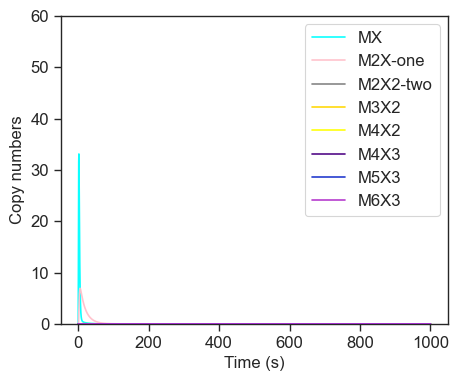

In [30]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[5], linestyle="-", label="MX", color="cyan", alpha=0.95, zorder=3)
       # ax.plot(self.timePoints, copies[4], linestyle="-", label="X", color="blue", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[7], linestyle="-", label="M2X-one", color="pink", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[9], linestyle="-", label="M2X2-two", color="gray", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[11], linestyle="-", label="M3X2", color="gold", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[13], linestyle="-", label="M4X2", color="yellow", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[16], linestyle="-", label="M4X3", color="indigo", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[18], linestyle="-", label="M5X3", color=(0.1, 0.2, 0.8), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[20], linestyle="-", label="M6X3", color=(0.7, 0.2, 0.8), alpha=0.95, zorder=3)
        
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
#ax.set_xlim(0, 10)
ax.set_ylim(0, 60)
ax.legend()

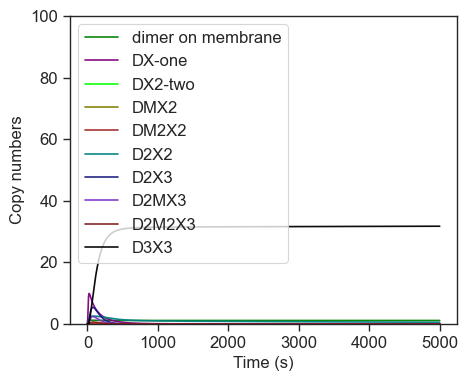

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(model.timePoints, copies[3], linestyle="-", label="dimer on membrane", color="green", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[8], linestyle="-", label="DX-one", color="purple", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[10], linestyle="-", label="DX2-two", color="lime", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[12], linestyle="-", label="DMX2", color="olive", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[14], linestyle="-", label="DM2X2", color="brown", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[15], linestyle="-", label="D2X2", color="teal", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[17], linestyle="-", label="D2X3", color=(0.1, 0.1, 0.5), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[19], linestyle="-", label="D2MX3", color=(0.5, 0.2, 0.8), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[21], linestyle="-", label="D2M2X3", color=(0.5, 0.1, 0.1), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[22], linestyle="-", label="D3X3", color="black", alpha=0.95, zorder=3)
        
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
        #ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.legend()

In [4]:

#create a plot of parameter ranges found
fileName = "../data/testParms_preStimOnly_7257.txt"

#THIS COMMAND BELOW BREAKS THE MODEL DEFINITION.
#model.plot_parameter_ranges_summary(percent=10, parameter_ranges = parameter_ranges, inputFile = fileName)


#best = 300
#totalTime = 10
#dt = 0.1
#model.filter_and_store_solutions(best=best, totalTime=totalTime, dt=dt)

In [5]:
#read in all solutions in the output file.

dataF = pd.read_csv(fileName, sep=",", engine="python")
dataF.columns = dataF.columns.str.strip()
dataF = dataF.sort_values(by="Rank")
print(dataF.shape)
print(dataF.loc[0])
#store the parameters in the param_cols vector
param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness"]]
print(param_cols)




NameError: name 'pd' is not defined

In [6]:
whichRow=1000
# Convert row to array of parameter values
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)

NameError: name 'model' is not defined

In [7]:

whichRow=3003


candidate = dataF.loc[whichRow][param_cols].values  # Gets all parameter columns for row 50
whichSol = model.simulate_pre(candidate)
print(candidate)
fit = model.fitness_function_to_call(candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(whichSol)
model.plot_freespecies_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12

NameError: name 'dataF' is not defined

#### We select the solution #3 in the following results (the last cell can be used to save all results of one solution in a single figure to pick nice solutions)

##### WT
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### DC2A
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### shRNA RIM2
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### DC2B
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### Endogenous level
experiment observe much slower mobility, and still a slow-down following stimulation

Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

#### Save all results of one solution in a single figure to pick nice solutions

In [ ]:
model.plot_diffusivity_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Plot the ranges of parameters in the best 10% solutions

In [ ]:
model.plot_parameter_ranges_summary(percent=10)

In [ ]:
model.plot_parms(percent=10)

In [ ]:
model.plot_all_diffusion()

In [ ]:
model.plot_cluster_kinetic(select=3, figsize=(6, 4), fontsize=12, dpi=300)

In [ ]:
# save all results of one solution in a single figure
# model.save_individual_solution_figures_combined(best=300)